# Testing and regularization

In [3]:
!git clone https://github.com/s7s/machine_learning_1.git
%cd  machine_learning_1/polynomial_regression

Cloning into 'machine_learning_1'...
remote: Enumerating objects: 378, done.
remote: Counting objects: 100% (126/126), done.
remote: Compressing objects: 100% (125/125), done.
remote: Total 378 (delta 74), reused 3 (delta 1), pack-reused 252 (from 1)
Receiving objects: 100% (378/378), 42.71 MiB | 19.96 MiB/s, done.
Resolving deltas: 100% (197/197), done.
/content/machine_learning_1/polynomial_regression


In [4]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
random.seed(0)

## Defining our dataset

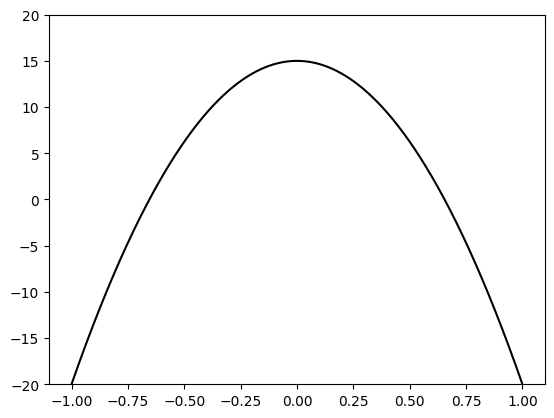

In [5]:
# Our original polynomial is -35x^2+x+15
coefs = [15,0,-35]

def polynomial(coefs, x):
    n = len(coefs)
    return sum([coefs[i]*x**i for i in range(n)])

def draw_polynomial(coefs):
    n = len(coefs)
    x = np.linspace(-1, 1, 1000)
    plt.ylim(-20,20)
    plt.plot(x, sum([coefs[i]*x**i for i in range(n)]), linestyle='-', color='black')

draw_polynomial(coefs)

In [6]:
X = []
Y = []
for i in range(40):
    x = random.uniform(-1,1)
    y = polynomial(coefs, x) + random.gauss(0,2)
    X.append(x)
    Y.append(y)
X=np.array(X)
Y=np.array(Y)

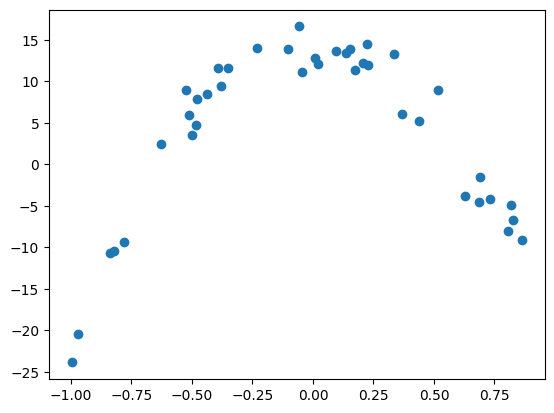

In [7]:
plt.scatter(X, Y)
#draw_polynomial(coefs)

## Training a polynomial regression model

In [8]:
for datasample in zip(X,Y):
    print(datasample)

(np.float64(0.6888437030500962), np.float64(-1.503313676546703))
(np.float64(-0.4821664994140733), np.float64(4.776223391096098))
(np.float64(0.02254944273721704), np.float64(12.087957039273702))
(np.float64(-0.3933745478421451), np.float64(11.552655381342872))
(np.float64(-0.04680609169528838), np.float64(11.13939451533042))
(np.float64(0.009373711634780513), np.float64(12.810729063756577))
(np.float64(-0.43632431120059234), np.float64(8.437955069843738))
(np.float64(-0.4989873172751189), np.float64(3.511211911084044))
(np.float64(0.8194925119364802), np.float64(-4.879955934160179))
(np.float64(0.8043319008791654), np.float64(-8.0368585173616))
(np.float64(-0.37970486136133474), np.float64(9.412786903432224))
(np.float64(0.36796786383088254), np.float64(6.014161594638752))
(np.float64(-0.055714569094573285), np.float64(16.612588226930765))
(np.float64(0.2217739468876032), np.float64(14.540743210654112))
(np.float64(0.8260221064757964), np.float64(-6.653701461777612))
(np.float64(0.730

### Adding columns to our dataset corresponding to $x^2, x^3, \ldots, x^{200}$

In [9]:
import numpy as np
import random
from sklearn.preprocessing import PolynomialFeatures

# Re-defining dependencies from previous cells to ensure X is available
coefs = [15,0,-35]

def polynomial(coefs, x):
    n = len(coefs)
    return sum([coefs[i]*x**i for i in range(n)])

# Re-defining X and Y from previous cell WvGqHRFCMA-E
X = []
Y = []
for i in range(40):
    x = random.uniform(-1,1)
    y = polynomial(coefs, x) + random.gauss(0,2)
    X.append(x)
    Y.append(y)
X=np.array(X)
Y=np.array(Y)

def addPoly(X,polyDegree):
    poly = PolynomialFeatures(polyDegree, include_bias=False)
    # Reshape X to a 2D array as PolynomialFeatures expects a 2D input
    X_reshaped = X.reshape(-1, 1)
    X_poly_transformed = poly.fit_transform(X_reshaped)
    return X_poly_transformed
X_poly=addPoly(X,200)

In [10]:
print(X_poly.shape)
print(X_poly[0,:])

(40, 200)
[7.96346243e-01 6.34167338e-01 5.05016777e-01 4.02168213e-01
 3.20265145e-01 2.55041945e-01 2.03101695e-01 1.61739272e-01
 1.28800461e-01 1.02569763e-01 8.16810456e-02 6.50463938e-02
 5.17994513e-02 4.12502984e-02 3.28495202e-02 2.61595919e-02
 2.08320928e-02 1.65895588e-02 1.32110328e-02 1.05205563e-02
 8.37800552e-03 6.67179321e-03 5.31305746e-03 4.23103334e-03
 3.36936751e-03 2.68318315e-03 2.13674282e-03 1.70158712e-03
 1.35505251e-03 1.07909097e-03 8.59330043e-04 6.84324251e-04
 5.44959046e-04 4.33976089e-04 3.45595228e-04 2.75213461e-04
 2.19165206e-04 1.74531388e-04 1.38987415e-04 1.10682106e-04
 8.81412791e-05 7.01909764e-05 5.58963204e-05 4.45128247e-05
 3.54476207e-05 2.82285796e-05 2.24797233e-05 1.79016432e-05
 1.42559063e-05 1.13526374e-05 9.04063014e-06 7.19947184e-06
 5.73327235e-06 4.56566989e-06 3.63585407e-06 2.89539872e-06
 2.30573990e-06 1.83616730e-06 1.46222493e-06 1.16443733e-06
 9.27295293e-07 7.38448123e-07 5.88060388e-07 4.68299680e-07
 3.72928691e-0

## Splitting data into training and testing

In [1]:
from sklearn.model_selection import train_test_split
## TODO ##
# use sklearn (train_test_split) to split data to 80% training 20% testing
X_train, X_test, y_train, y_test = train_test_split(X_poly, Y, test_size=0.2, random_state=42)

NameError: name 'X_poly' is not defined

In [ ]:
from sklearn.metrics import mean_squared_error
def display_results(model):
    coefs = [model.intercept_]
    coefs += list(model.coef_)
    ytrain_predict=model.predict(X_train)
    ytest_predict=model.predict(X_test)
    train_error=np.sqrt(mean_squared_error(y_train,ytrain_predict))
    test_error=np.sqrt(mean_squared_error(y_test,ytest_predict))
    print("Training error (rmse):", train_error)
    print("Testing error (rmse):", test_error)
    plt.scatter(X_train[:,0], y_train, marker='o')
    plt.scatter(X_test[:,0], y_test, marker='^')
    draw_polynomial(coefs)
    plt.show()
    print("Polynomial coefficients")
    print(coefs)

## Training a polynomial regression model with no regularization

In [ ]:
from sklearn.linear_model import LinearRegression
## TODO ##
# use sklearn linear regression to fit the data

model_no_reg =

In [ ]:
display_results(model_no_reg)

## Training a polynomial regression model with L1 regularization

In [ ]:
from sklearn import linear_model
## TODO ##
# use sklearn Lasso (linear regression with L1 Norm) to fit the data

model_L1_reg =

In [ ]:
display_results(model_L1_reg)

## Training a polynomial regression model with L2 regularization

In [ ]:
from sklearn import linear_model
## TODO ##
# use sklearn Ridge (linear regression with L2 Norm) to fit the data

model_L2_reg =

In [ ]:
display_results(model_L2_reg)

## Viewing the predictions in the testing set

In [ ]:
import pandas as pd
from IPython.display import display
predictions={}
predictions ['x']=X_test[:,0]
predictions ['y']=y_test
predictions['No reg'] = model_no_reg.predict(X_test)
predictions['L1 reg'] = model_L1_reg.predict(X_test)
predictions['L2 reg'] = model_L2_reg.predict(X_test)
predictions=pd.DataFrame.from_dict(predictions)
display(predictions)

### Real Example (Predict fuel efficiency)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
#### Get data

url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)

dataset = raw_dataset.copy()

#### Clean data

dataset.isna().sum()

dataset = dataset.dropna()

dataset.isna().sum()

dataset.head()

dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})

dataset = pd.get_dummies(dataset, columns=['Origin'], prefix='', prefix_sep='')

dataset.head()

In [ ]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

#### using 50th order

In [ ]:
from sklearn import preprocessing

X_train=train_dataset[['Horsepower']]
y_train=train_dataset[['MPG']]

X_test=test_dataset[['Horsepower']]
y_test=test_dataset[['MPG']]

from sklearn.preprocessing import PolynomialFeatures
def addPoly(X,polyDegree):
    poly = PolynomialFeatures(polyDegree,include_bias=False)
    X=poly.fit_transform(X)
    return X

X_trainPoly=addPoly(X_train,50)
X_testPoly=addPoly(X_test,50)
scaler=preprocessing.StandardScaler().fit(X_trainPoly)

X_trainPoly=scaler.transform(X_trainPoly)
X_testPoly=scaler.transform(X_testPoly)

##### no regularization

In [ ]:
# no regularization
from sklearn.linear_model import LinearRegression
model_no_reg = LinearRegression()
model_no_reg.fit(X_trainPoly, y_train)
ytest_predict=model_no_reg.predict(X_testPoly)
test_error=np.sqrt(mean_squared_error(y_test,ytest_predict))
print(test_error)

##### lasso regularization

In [ ]:
# lasso regularization
from sklearn import linear_model
model_L1_reg = linear_model.Lasso(alpha=0.5)
model_L1_reg.fit(X_trainPoly, y_train)
ytest_predict=model_L1_reg.predict(X_testPoly)
test_error=np.sqrt(mean_squared_error(y_test,ytest_predict))
print(test_error)

##### ridge regularization

In [ ]:
# ridge regularization
from sklearn import linear_model
model_L2_reg = linear_model.Ridge(alpha=0.5)
model_L2_reg.fit(X_trainPoly, y_train)
ytest_predict=model_L2_reg.predict(X_testPoly)
test_error=np.sqrt(mean_squared_error(y_test,ytest_predict))
print(test_error)